In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
data = {
    "Name": ["Alice", "Bob", "Charlie", "Diana", "Evan"],
    "Math": [85, 92, 78, 90, 88],
    "English": [79, 85, 92, 88, 76],
    "History": [91, 89, 84, 77, 85]
}

df = pd.DataFrame(data)
df[(df["Math"] > 85) & (df["English"] > 85)]
df["Average"] = df[["English", "History", "Math"]].mean(axis=1)

df_sorted = df.sort_values(by="Average", ascending=False)
df["Class"] = ["A", "A", "B", "B", "A"]
df.groupby("Class")[["Average"]].mean()

Text(0.5, 1.0, 'GOOG with Moving Averages')

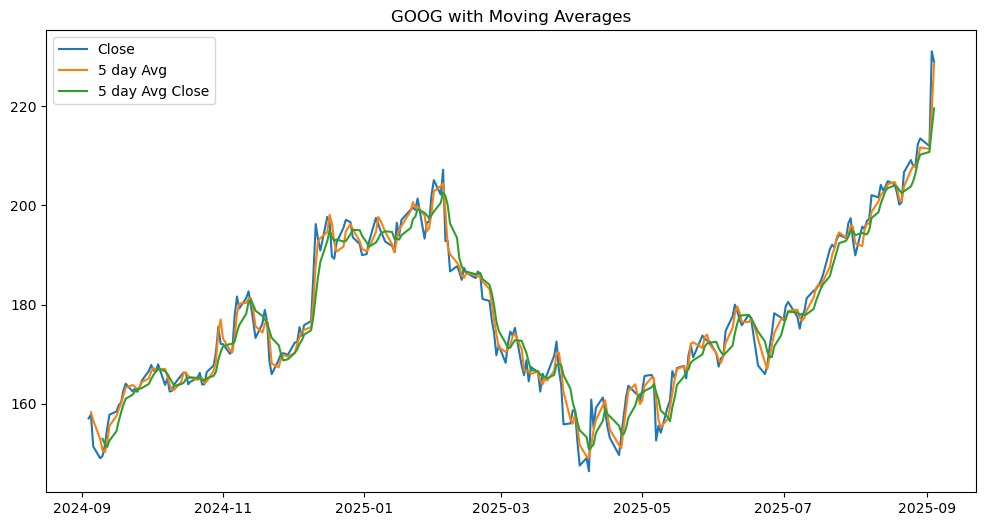

In [ ]:
GOOG = yf.Ticker("GOOG")
goog_1mo_stock = pd.DataFrame(GOOG.history(period="1y", interval="1d"))
goog_1mo_stock[(goog_1mo_stock["Volume"] > 20000000)]
goog_1mo_stock["DayRange"] = goog_1mo_stock["High"] - goog_1mo_stock["Low"]
goog_1mo_stock.nlargest(1, "DayRange")["Close"]

day_avg = goog_1mo_stock[["High", "Low"]].mean(axis=1)
goog_1mo_stock["5MA"] = day_avg.rolling(window=5).mean()
goog_1mo_stock["Volatility_5D"] = goog_1mo_stock["Close"].rolling(
    window=5).std()
goog_1mo_stock.loc[goog_1mo_stock["Volatility_5D"].idxmax()]
goog_1mo_stock["5MA_CLOSE"] = goog_1mo_stock["Close"].rolling(window=5).mean()

plt.figure(figsize=(12, 6))
plt.plot(goog_1mo_stock.index, goog_1mo_stock["Close"], label="Close")
plt.plot(goog_1mo_stock.index, goog_1mo_stock["5MA"], label="5 day Avg")
plt.plot(goog_1mo_stock.index,
         goog_1mo_stock["5MA_CLOSE"], label="5 day Avg Close")
plt.legend()
plt.title("GOOG with Moving Averages")


In [ ]:
a = np.arange(12)
a2 = a.reshape(3, 4)
mid_2 = a2[:, 1:2]

M = np.array([[2,  5,  8],
              [1, 10, 11],
              [4,  7,  6]], dtype=float)

col_means = M.mean(axis=0)
row_means = M.mean(axis=1)
col_mm = (M - M.min(axis=0)) / (M.max(axis=0) - M.min(axis=0))

steps = np.array([3450, 5600, 10200, 8900, 12000, 3000, 4500,
                  6800, 9900, 10100, 11200, 3400, 7200, 8300])

boolean_mask = (steps < 4000) | (steps > 11000)

X = np.random.uniform(100, 200, [2, 3])
Y = np.random.normal(50, 5, [2, 3])
np.random.multivariate_normal(
    mean=(5, -2), cov=([[2.0, 1.2], [1.2, 3.0]]), size=10)